# Task 2 - Titanic Survival Prediction.

## Import All Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings 
warnings.filterwarnings("ignore")

## Read The Dataset

In [2]:
df = pd.read_csv("titanic_data.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     fair Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

## Show The Columns

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'fair', 'Cabin', 'Embarked'],
      dtype='object')

## Fetch Top 3 Records

In [4]:
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     fair Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

## Fetch Last 3 Records

In [5]:
df.tail(3)

PassengerId  Survived  Pclass                                      Name  \
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   fair Cabin Embarked  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

## How many rows and columns present?

In [6]:
sh = df.shape
sh

(891, 12)

In [7]:
print('Total number of rows:',sh[0])
print('Total number of columns:',sh[1])

Total number of rows: 891
Total number of columns: 12


## Known about type of Data in file

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
fair           float64
Cabin           object
Embarked        object
dtype: object

## List out the names of columns

In [9]:
print(list(df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'fair', 'Cabin', 'Embarked']


In [10]:
np.array(df.columns)

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'fair', 'Cabin', 'Embarked'], dtype=object)

## Check the abstract summary of data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   fair         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check the missing values

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
fair             0
Cabin          687
Embarked         2
dtype: int64

## Check descriptive statistics

In [13]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        fair  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Fill The missing Values

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

## Change The Data Type Float To Int

In [15]:
df['Age'] = df['Age'].astype(int)
df['fair'] = df['fair'].astype(int)

## Again Check type of Data in file

In [16]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int32
SibSp           int64
Parch           int64
Ticket         object
fair            int32
Cabin          object
Embarked       object
dtype: object

## Drop The Columns

In [17]:
data = df.drop(['PassengerId','Name','Embarked','Cabin','Ticket'], axis =1, inplace=True)

In [18]:
df.head()

Survived  Pclass     Sex  Age  SibSp  Parch  fair
0         0       3    male   22      1      0     7
1         1       1  female   38      1      0    71
2         1       3  female   26      0      0     7
3         1       1  female   35      1      0    53
4         0       3    male   35      0      0     8

## Perform Exploratory Data Analysis

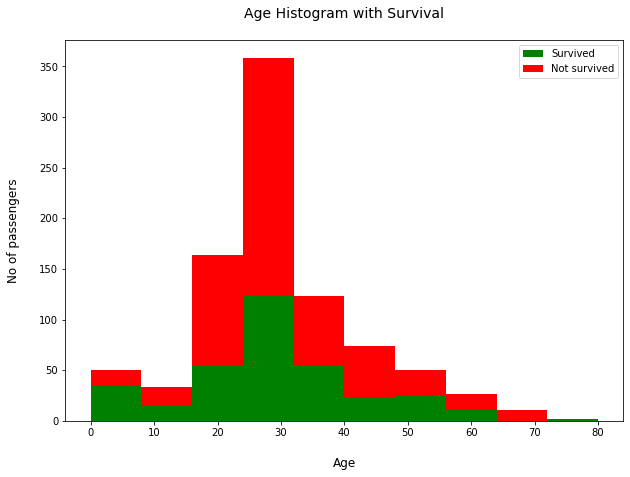

In [19]:
fig = plt.figure(figsize = (10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival\n', size = 14)
plt.xlabel('\nAge', size = 12)
plt.ylabel('No of passengers\n', size = 12)
plt.legend()
plt.show()

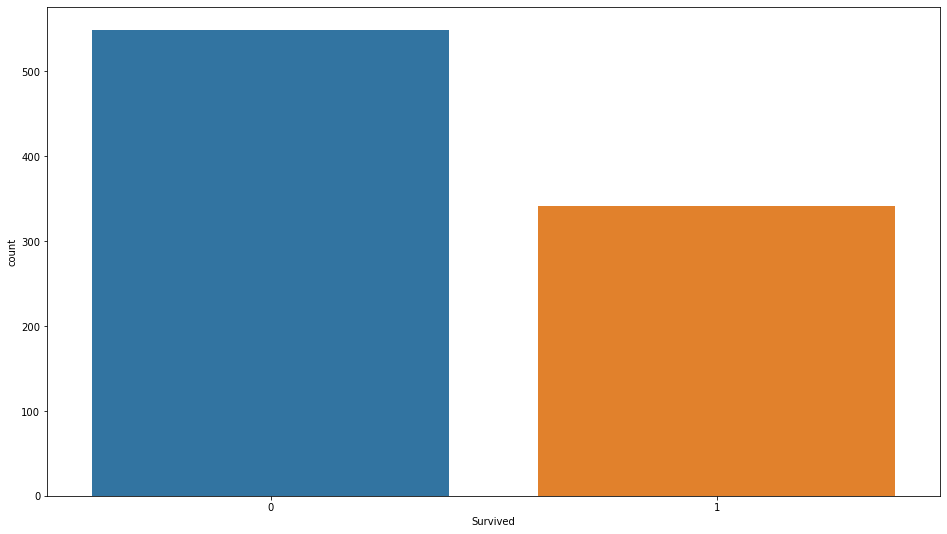

In [20]:
plt.figure(figsize = (16,9))
sns.countplot(x = "Survived", data = df)
plt.show()

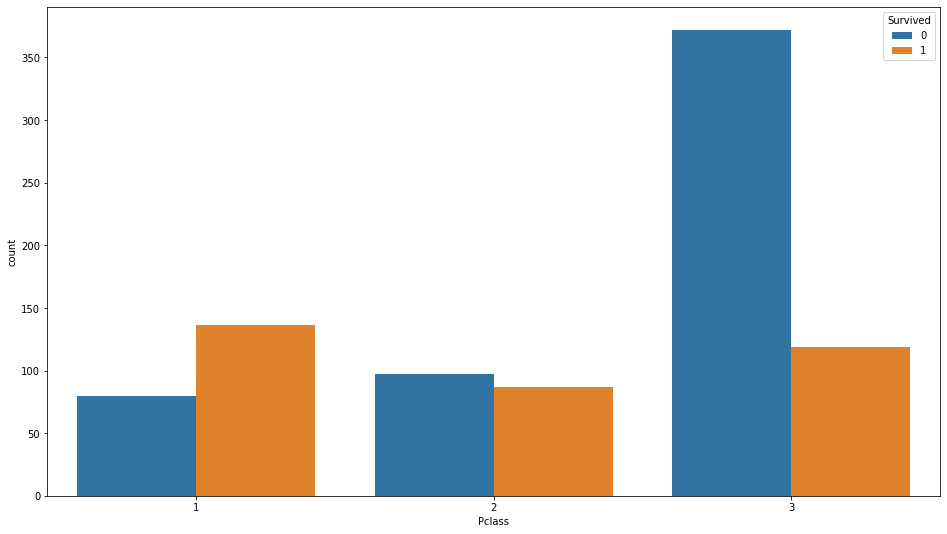

In [21]:
plt.figure(figsize = (16,9))
sns.countplot(x = "Pclass", hue = "Survived", data = df)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Sex'>

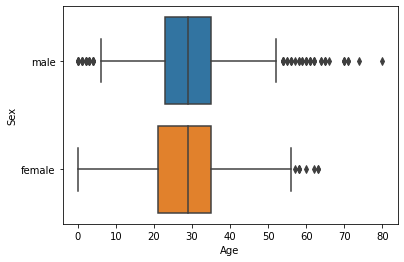

In [22]:
sns.boxplot(x = "Age", y = "Sex", data = df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

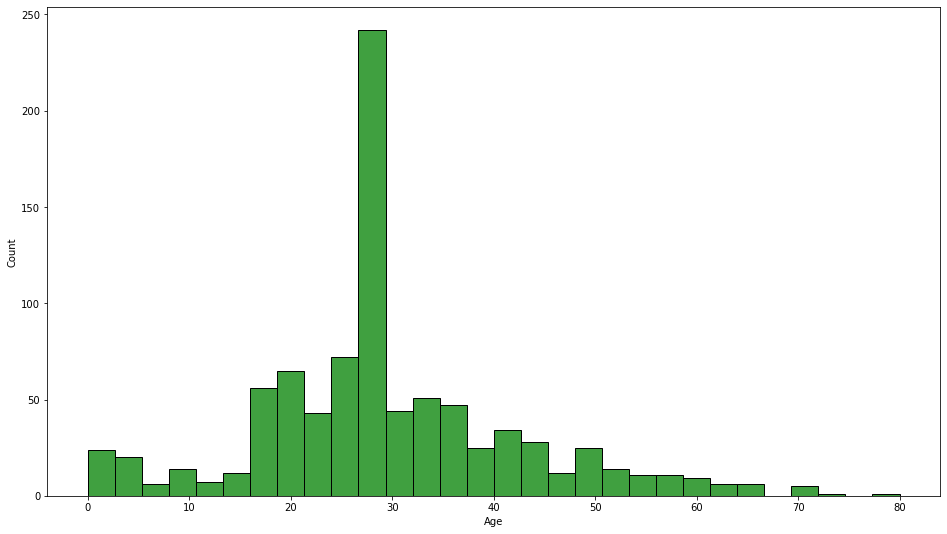

In [23]:
plt.figure(figsize = (16,9))
sns.histplot(df["Age"], color = "green")

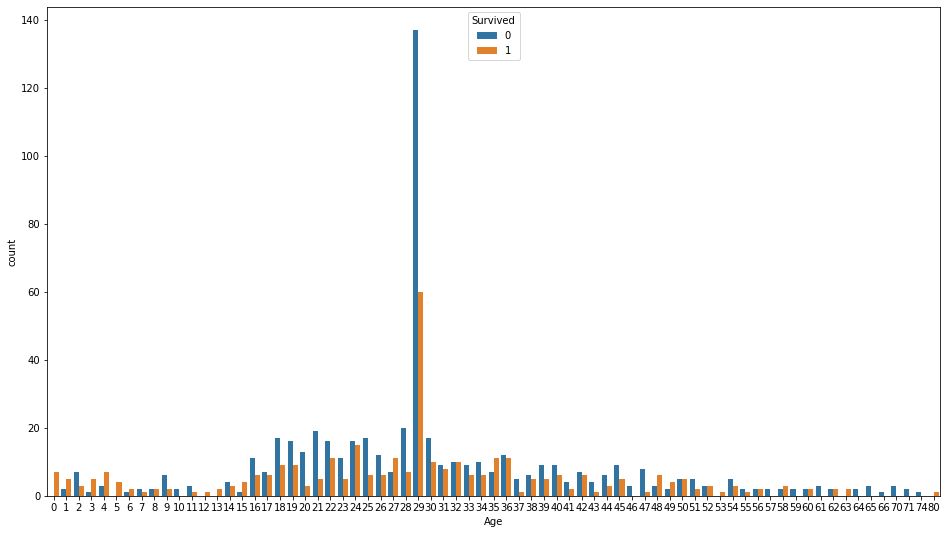

In [24]:
plt.figure(figsize = (16,9))
sns.countplot(x = "Age", hue = "Survived", data = df)
plt.show()

## Using Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
Le = LabelEncoder()
df['Sex'] = Le.fit_transform(df['Sex'])
df.head()

Survived  Pclass  Sex  Age  SibSp  Parch  fair
0         0       3    1   22      1      0     7
1         1       1    0   38      1      0    71
2         1       3    0   26      0      0     7
3         1       1    0   35      1      0    53
4         0       3    1   35      0      0     8

## Split the dataset into train and test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

In [29]:
x_train

Pclass  Sex  Age  SibSp  Parch  fair
301       3    1   29      2      0    23
309       1    0   30      0      0    56
516       2    0   34      0      0    10
120       2    1   21      2      0    73
570       2    1   62      0      0    10
..      ...  ...  ...    ...    ...   ...
715       3    1   19      0      0     7
767       3    0   30      0      0     7
72        2    1   21      0      0    73
235       3    0   29      0      0     7
37        3    1   21      0      0     8

[712 rows x 6 columns]

In [30]:
y_train

301    3
309    1
516    2
120    2
570    2
      ..
715    3
767    3
72     2
235    3
37     3
Name: Pclass, Length: 712, dtype: int64

In [31]:
x_test

Pclass  Sex  Age  SibSp  Parch  fair
862       1    0   48      0      0    25
223       3    1   29      0      0     7
84        2    0   17      0      0    10
680       3    0   29      0      0     8
535       2    0    7      0      2    26
..      ...  ...  ...    ...    ...   ...
796       1    0   49      0      0    25
815       1    1   29      0      0     0
629       3    1   29      0      0     7
421       3    1   21      0      0     7
448       3    0    5      2      1    19

[179 rows x 6 columns]

In [32]:
y_test

862    1
223    3
84     2
680    3
535    2
      ..
796    1
815    1
629    3
421    3
448    3
Name: Pclass, Length: 179, dtype: int64

## Model Building

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

## Training accuracy

In [35]:
LR.score(x_train,y_train)*100

97.47191011235955

## Predict The Model

In [36]:
y_pred = LR.predict(x_test)
y_pred

array([1, 3, 2, 3, 2, 3, 2, 1, 1, 3, 3, 3, 1, 2, 3, 1, 3, 3, 3, 2, 3, 3,
       1, 1, 3, 3, 1, 2, 2, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1,
       2, 3, 3, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 3, 3, 3, 2, 1, 1, 3,
       3, 3, 3, 2, 3, 3, 1, 3, 2, 2, 1, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 3,
       1, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 3, 2, 1, 1, 2, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 3, 3, 1, 3, 3, 2, 3, 3, 1, 1, 3, 1, 3, 1, 2,
       3, 3, 3], dtype=int64)

## Check Performance of a model

## Accuracy score

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
LRAcc = accuracy_score(y_pred, y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 98.32%


## Classification report

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.95      0.96        42
           2       0.94      0.97      0.96        34
           3       1.00      1.00      1.00       103

    accuracy                           0.98       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.98      0.98      0.98       179

